In [23]:
#Se inserta dataset cuyo objetivo es realizar una automatización para la aprobación o desaprobación
#de una solicitud de crédito mediante un dataset de entrada
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("loan_data.csv", sep=';' ,encoding='latin-1')
#Se imprime un head del dataframe
print(data.head(5))

C:\Users\lesar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,19,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


        id  member_id  loan_amnt  funded_amnt funded_amnt_inv        term  \
0  1077501    1296599       5000         5000            4975   36 months   
1  1077430    1314167       2500         2500            2500   60 months   
2  1077175    1313524       2400         2400            2400   36 months   
3  1076863    1277178      10000        10000           10000   36 months   
4  1075358    1311748       3000         3000            3000   60 months   

   int_rate installment grade sub_grade  ... total_bal_il il_util open_rv_12m  \
0     10.65      162.87     B        B2  ...          NaN     NaN         NaN   
1     15.27       59.83     C        C4  ...          NaN     NaN         NaN   
2     15.96       84.33     C        C5  ...          NaN     NaN         NaN   
3     13.49      339.31     C        C1  ...          NaN     NaN         NaN   
4     12.69       67.79     B        B5  ...          NaN     NaN         NaN   

   open_rv_24m max_bal_bc all_util total_rev_hi_li

In [5]:
import seaborn as sns
#Se obtienen columnas de los datos presentes
print(data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

C:\Users\lesar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lesar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lesar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

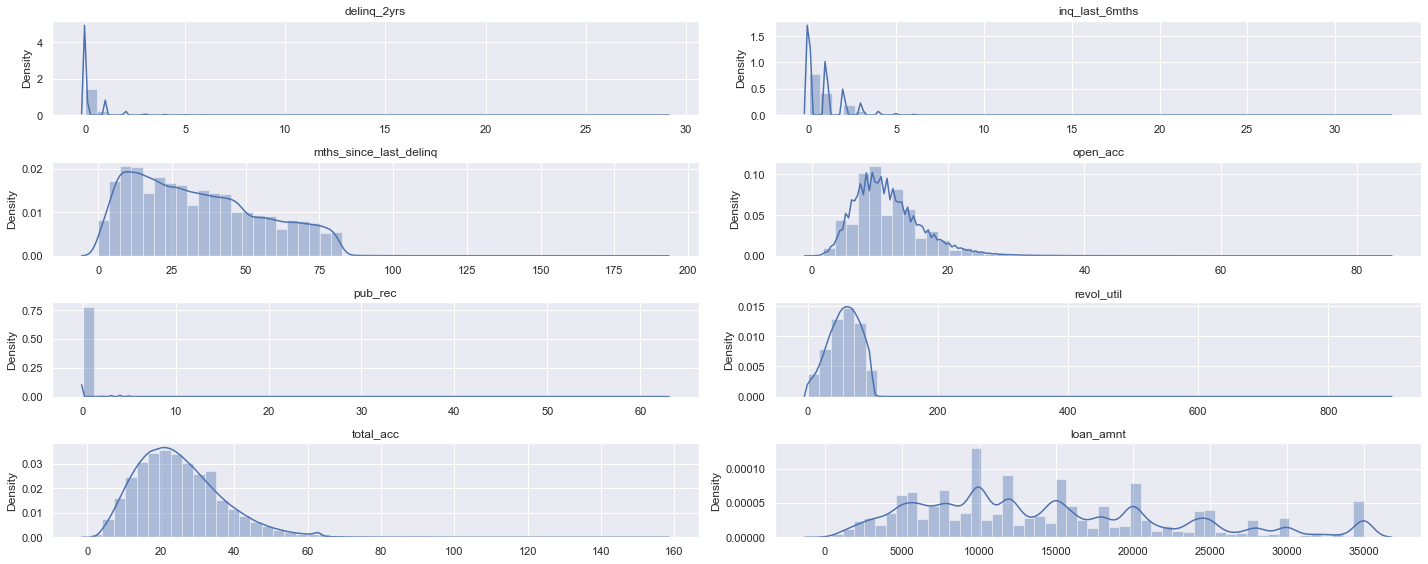

In [20]:
#Se realiza la comparación de varias variables de interés en un gráfico simultaneo
variables = ['delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc','pub_rec','revol_util','total_acc','loan_amnt']
columns = 2
fig, axes = plt.subplots(4,2)
for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(data[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.gcf().set_size_inches(20, 8)
plt.tight_layout()


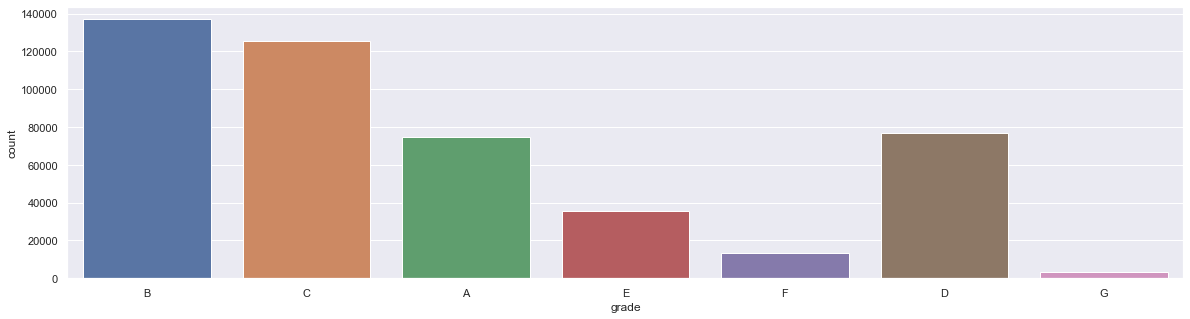

In [21]:
#Se añade conteo de las veces en las que se clasifica en cierto grado de crédito
plt.figure(figsize = (20,5))
sns.countplot(x = data['grade'], data = data)
plt.show()

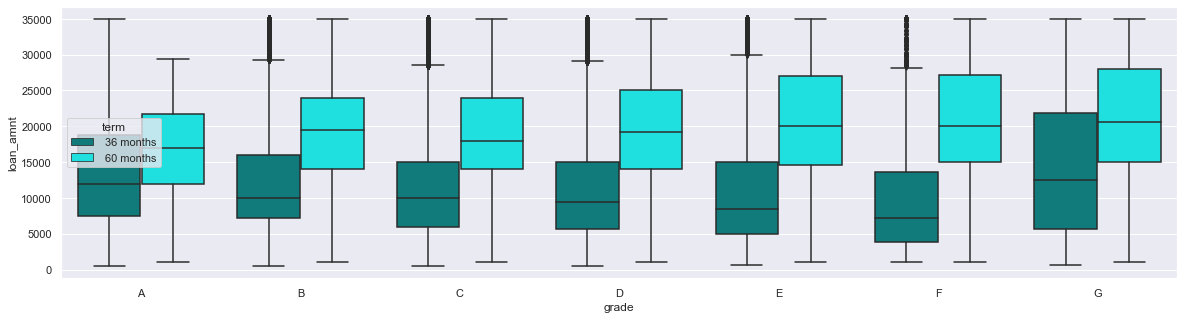

In [22]:
#Identificar el boxplot del término de pago según el grado y la cantidad de préstamo
plt.figure(figsize = (20,5))
sns.boxplot(x='grade', y = 'loan_amnt', hue = 'term',data = data, palette = ['#008B8B','#00FFFF'], order = ['A','B','C','D','E','F','G'])
plt.show()